### Steane [[7, 1, 3]], code capacity model

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

In [296]:
def steane_Err():
    # col 1: X error
    # col 2: Z error
    return np.zeros((7, 2))

In [297]:
def AddError(p, P_matrix):
    # Depolarizing model
    # (1-p):I, p/3:X, p/3:Y, p/3: Z
    for i in range(7):
        r1 = rand.random()
        if r1 < p:
            r2 = rand.random()
            if r2 < 1/3:
                P_matrix[i][0] = 1
            elif r2 > 2/3:
                P_matrix[i][1] = 1
            else:
                P_matrix[i][0] = 1
                P_matrix[i][1] = 1
    return P_matrix

In [278]:
def Decoder(P_matrix):
    # Detect
    H = np.array([[1, 1, 1, 1, 0, 0, 0],
                  [0, 1, 1, 0, 1, 1, 0],
                  [0, 0, 1, 1, 0, 1, 1]]).transpose()
    check = np.mod(np.dot(P_matrix.transpose(), H), 2)
    # Decode
    correct_matrix = np.array([[1, 0, 0],
                              [1, 1, 0],
                              [1, 1, 1],
                              [1, 0, 1],
                              [0, 1, 0],
                              [0, 1, 1],
                              [0, 0, 1]])
    correct = np.zeros((7, 2))
    for i in range(7):
        for j in range(2):
            if (correct_matrix[i] == check[j]).all():
                correct[i][j] = 1
                
    return np.mod(np.sum(correct+P_matrix, axis=0), 2)

In [279]:
# Example, adding random error, syndrome
P = steane_Err()
P_ = AddError(1/2, P)
P_

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.]])

In [310]:
num_exp = 10000
len_list = 21
p_list = np.linspace(0, 0.2, len_list)
result_list = np.ones(len_list)*num_exp

In [311]:
for j in range(len_list):
    for i in range(num_exp):
        P_ = AddError(p_list[j], steane_Err())
        error = Decoder(P_)
        if (error==np.array([0, 0])).all():
            result_list[j] -= 1

In [312]:
result_list /= num_exp
# result_list = 1-result_list

Text(0, 0.5, 'Logical error rate')

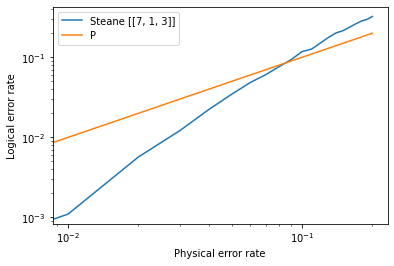

In [313]:
plt.loglog(p_list, result_list, label='Steane [[7, 1, 3]]')
plt.loglog(p_list, p_list, label='P')
plt.legend()
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')